In [1]:
# ---
# date: 2023-07-01
# title: Searching for meaning
# author: Karel Minarik
# description: A demonstration of differences between lexical and semantic search in&nbsp;Elasticsearch, with a&nbsp;Sentence&nbsp;Transformer model and the&nbsp;Quora&nbsp;dataset.
# cover: /assets/images/semantic-search-cover.jpeg

# Searching for meaning

> “The limits of my language mean the limits of my world”
>
> Ludwig Wittgenstein, Tractatus Logico-Philosophicus, 5.6

When OpenAI [released ChatGPT](https://openai.com/blog/chatgpt) in November 2022, it unleashed a new wave of interest in artificial intelligence and machine learning. Even though the necessary technological innovations have been available for nearly a decade, and the foundational principles date even earlier, this seismic shift launched a [“cambrian explosion”](https://twitter.com/karpathy/status/1654892810590650376) of various developments, especially in the area of large language models and generative transformers. Some skeptics argue that the models are “stochastic parrots”, only able to generate permutations of content they have been trained on. Some consider the models a “black box”, out of reach of human understanding, or maybe even a “black magic”, which works on completely esoteric principles.

Despite being a software developer, I never paid particular attention to the advances in machine learning, and was, in fact, quite skeptical of the broad utility of artificial intelligence. As for many people, interacting with tools such as Midjourney and ChatGPT changed that. Perhaps this is evidence that personal experience trumps theoretical assumptions, that a hands-on, practical exploration is crucial for proper understanding.

I became particularly excited about the possibilities of using machine learning models in the context of semantic search. After all, I've spent nearly ten years at [_Elastic_](https://www.elastic.co), the company behind _Elasticsearch_, an advanced search and analytics engine based on _Apache Lucene_. Being well aware of all the complexities of inverted indices, scoring algorithms, peculiarities of language analysis, and so on, some of the examples I have stumbled upon looked almost like... yes, “black magic”.

One remarkable example I came across is an [article](https://docs.pinecone.io/docs/semantic-text-search) by James Briggs: he loads the [_Quora_ dataset](https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs), a collection of about 400,000 question pairs, in a Python notebook, and uses the capabilities of _Pinecone_, a vector database, to search for similar questions, with a particularly impressive query variation. Naturally, I wanted to try the example with Elasticsearch, because it has all the necessary technical underpinnings of a vector database: the ability to store “embeddings” and perform a “nearest neighbour” search. This notebook is a journal of my journey, a hands-on exercise to facilitate a better understanding.

But before we dive into the Python code, I would like to take a historical detour. As I have discovered, one of the difficulties of the machine learning or artificial intelligence topics is an abundance of highly specific jargon and a lack of intuitive mental model of how the technology works. For instance, it wouldn't help if I would explain the term “embeddings” from the last paragraph by saying that they are “dense vectors” — not only would your eyes just glaze over, but I would have to explain two terms instead of one.

Furthermore, my background is not in machine learning or mathematics — I majored in philosophy, with special focus on the philosophy of language.

So let's start more than a hundred years ago, with the theory of language by Ferdinand de Saussure; hopefully, it will provide a more intuitive foundation of understanding, if not for _how_, then for _why_ machine learning models work — without giving in to “black magic”.

## Saussure's Theory of Language

In his [_“Course in General Linguistics”_](https://en.wikipedia.org/wiki/Course_in_General_Linguistics), first published in 1916, Ferdinand de Saussure defines language as a _system_ of _signs_ representing _concepts_. Today, a statement like this might sound unsurprising and quite tame. Historically, though, it represents a major shift in thinking about language. It challenges the traditional approach — which, to a certain extent, mirrors a naïve approach to language:

> Some people regard language, when reduced to its elements, as a naming-process only — a list of words, each corresponding to the thing that it names. (...) This conception is open to criticism at several points.
>
> (_English translation by Wade Baskin, 3<sup>rd</sup> edition, p. 65. Available online from [archive.org](https://archive.org/details/courseingenerall00saus)_)

Saussure's argument upends this simplistic understanding, which considers language simply a collection of “labels” assigned to “things”, and is one of the catalysts for the so-called “linguistic turn” of human sciences in the 20th century. Let's have a closer look at the three terms used in the definition, to have a better understanding of its significance.

First, language is defined as a **system**. Therefore, language is not a collection of isolated elements, but a structure, where each part plays a role in relation to the other parts. The meaning of each language element is to be understood in relation to others, not on its own (p. 118):

> The important thing in the word is not the sound alone but the phonic differences that make it possible to distinguish this word from all others, for differences carry signification.

Saussure gives an example (p. 116):

> Within the same language, all words used to express related ideas limit each other reciprocally; synonyms like French _redouter_ ‘dread’, _craindre_ ‘fear’, and _avoir peur_ ‘be afraid’ have value only through their opposition: if _redouter_ did not exist, all its content would go to its competitors.

Second, it is a system of **signs**, not “labels” or “words”. The sign, in Saussure's theory, unites the “signifier” (a sound pattern or other representation) and the “signified” (the meaning) — we can't separate one from the other (p. 65-66):

> (...) the linguistic unit is a double entity. (...) The linguistic sign unites, not a thing and a name, but a concept and a sound-image. The latter is not the material sound, a purely physical thing, but the psychological imprint of the sound, the impression that it makes on our senses. The psychological character of our sound-images becomes apparent when we observe our own speech. Without moving our lips or tongue, we can talk to ourselves or recite mentally a selection of verse.

Saussure provides a very illustrative analogy (p. 113):

> Language can also be compared with a sheet of paper: thought is the front and the sound the back; one cannot cut the front without cutting the back at the same time; likewise in language, one can neither divide sound from thought nor thought from sound; the division could be accomplished only abstractedly, and the result would be either pure psychology or pure phonology.

Third, what the sign represents is not a “thing in the world”, but a **concept**, ie. the abstract meaning of the sign. This meaning is not defined by a set of internal characteristics or a list of properties, or by a thing in the world which I may point to, but by its position within the system of signs (p. 117, emphasis mine):

> Instead of pre-existing ideas then, we find in all the foregoing examples _values emanating from the system_. When they are said to correspond to concepts, it is understood that the concepts are purely differential and defined not by their positive content but negatively by their relations with the other terms of the system. _Their most precise characteristic is in being what the others are not_.

This theory has profound implications for our understanding of language, not only from a linguistic perspective, but from a broader philosophical one. Contrary to the aforementioned naïve understanding, which “assumes that ready-made ideas exist before words” (p. 65), Saussure asserts that language directly influences our understanding of the world. We might even say that language _itself_ is the system for understanding the world. In other words, there is no meaning without language.

Since the meaning of the sign is defined by its position in the system of the language, Saussure further argues that the nature of the sign is _arbitrary_. In other words, “cat” represents a concept of a cat not because there is some natural relation between the sign and the concept, but simply because it does not represent a “dog” or a “chair”: “the bond between the signifier and the signified is arbitrary” (p. 67).

Saussure calls this theory “the arbitrary nature of the sign” and provides this clarification (p. 67-70):

> The word _arbitrary_ also calls for comment. The term should not imply that the choice of the signifier is left entirely to the speaker (we shall see below that the individual does not have the power to change a sign in any way once it has become established in the linguistic community); I mean that it is unmotivated, i.e. arbitrary in that it actually has no natural connection with the signified.

To summarize, the most important aspect of language is that it is a system of relations between signs, which is shared among speakers, and the meaning is given by the position of the sign within the system, not by a relationship to the signified conceptual entity. _This_ ability, ie. to create and work with such a system, is what distinguishes humans, not the ability to come up with phonetic or graphic marks (p. 10):

> (...) what is natural to mankind is not oral speech but the faculty of constructing a language, i.e. a system of distinct signs corresponding to distinct ideas.

How is such a long explanation of language as a _system of distinct signs corresponding to distinct ideas_ useful for the primary topic of this article, semantic search, you may ask? In my opinion, it helps prevent both too skeptical and too optimistic understanding of what machine learning models are capable of, ie. the “stochastic parrot” on one side and “black magic” on the other.

By continuing the trajectory of Sassure's argument, we can say that meaning is _embedded_ in the system of language. That already answers the question whether the machine learning models “understand the meaning” of what they “say”: of course they do, if meaning is given by a position within the system of signs. Of course they don't, for other definitions of “understanding the meaning” — if we ignore the question whether such definitions are even possible.

By continuing even further, since language is a “system of distinct signs”, we can use _other signs_ than phonetic or graphic marks to represent concepts. When the sign “cat” doesn't represent the concept of a cat because of some natural connection between them (the sign is “arbitrary” or “unmotivated”), we can use a different representation — for example, a number. Or, more plausibly, a collection of numbers.

A numerical representation of language is a significant leap, because it opens up a new opportunity: performing _arithmetic operations_. All natural language processing depends on this step. The specific formulas and workflows might be quite complex, intimidating even, but the underlying foundation is simple: represent the system of signs with numbers and use them for computation.

## Lexical and Semantic Search

In fact, representing language elements with numbers is the foundation of traditional full-text search. The main difference between a modern inverted index and a [traditional concordance](https://en.wikipedia.org/wiki/Concordance_(publishing\)) — or an index at the back of a book — is that inverted index stores more information than simply the _occurrences_ of terms. It also tracks their _positions_ and the _frequency_ of their occurrences within a document. This already allows for certain arithmetic operations, such as phrase search (searching for terms occurring in a specific order), and proximity search (finding terms that occur within a certain number of positions from each other).

Using these numbers, specifically the frequency of term occurrences within a document, as well as the overall frequency of the term in the whole collection of documents, is the basis of the [traditional method](https://www.elastic.co/guide/en/elasticsearch/guide/2.x/scoring-theory.html) of scoring search results, the TF-IDF (term frequency vs. inverse document frequency) formula and more sophisticated formulas like BM-25. Put simply, the more frequently a term occurs within a specific document, the higher the document is ranked in the list of relevant documents. Conversely, the more frequently that particular term appears within the entire collection, the less the document rises in the list. Storing the statistical information about the terms in the collection allows more sophisticated operations than a simple lookup such as “this particular document contains this particular word”.

The fundamental distinction between the traditional “lexical” search and “semantic” search is that lexical search can only find documents that contain the exact terms present in the query. By “terms”, we mean variations of words that the search engine recognizes as carrying the same meaning. Of course, modern search engines like Elasticsearch have sophisticated tools for transforming “words” into “terms”, from simple ones like removing capitalization to more advanced ones like stemming (removing suffixes, `walking ⇒ walk`), lemmatization (reducing different inflected forms to a basic one, `worst ⇒ bad`), or synonymization. These help in broadening the scope of the query (and finding more relevant documents).

However, even with these transformations, you cannot search for “cat” using a query like “a domestic animal which catches mice” if those specific terms are missing in the document. A large language model, on the other hand, is quite capable of retrieving documents for an “indirect” query like that. It is not because it “understands” that particular phrase in a naïvely anthropomorphic sense. It is because, as we have seen before, it understands the _system of distinct signs corresponding to distinct ideas_: the human language. In this system, the concept occupying the position closest to the sign “a domestic animal which catches mice” is, yes, a concept of a cat.

In semantic search, the relevance of search results is therefore determined by semantic proximity within the system, not just keyword matching, however sophisticated. As the name suggests, a “lexical search” behaves much like searching for a word definition in a dictionary (_lexicon_): it works very well if you know the word you're searching for. Otherwise, you might as well read the entire dictionary.

## Semantic Search with Elasticsearch

Interestingly, the supporting infrastructure for semantic search has been part of Elasticsearch for many years — the `dense_vector` mapping field was introduced in version [7.0](https://www.elastic.co/guide/en/elasticsearch/reference/7.0/dense-vector.html), released in April 2019. Version [7.3](https://www.elastic.co/blog/elasticsearch-7-3-0-released), which came out a few months later, added support for specifying dimensions for the type and introduced predefined functions to the `script_score` query, enabling the computation of similarity scores for documents. Version [`8.0`](https://www.elastic.co/blog/whats-new-elastic-8-0-0), released in February 2022, further improved the `dense_vector` implementation and added the "approximate nearest neighbor" search endpoint, effectively tying together the key components for a comprehensive implementation of [semantic search](https://www.elastic.co/blog/how-to-deploy-nlp-text-embeddings-and-vector-search), including the ability to run third-party models within the cluster itself. In the latest version, [8.8](https://www.elastic.co/blog/whats-new-elasticsearch-8-8-0), Elastic not only focused on [improving the communication](https://www.elastic.co/blog/may-2023-launch-announcement) of its AI capabilities in response to the current wave of interest, but also added enhancements like a higher number of dimensions in the `dense_vector` field, allowing for storage of embeddings from large language models like those developed by OpenAI, and provided a [custom, built-in model](https://www.elastic.co/blog/may-2023-launch-sparse-encoder-ai-model), the _Elastic Learned Sparse Encoder_.

In the rest of this notebook, I would like to demonstrate how to use a model from [_Sentence Transformers_](https://huggingface.co/sentence-transformers), using the queries from the [article](https://docs.pinecone.io/docs/semantic-text-search) by James Briggs mentioned above. Hopefully, you'll see that Elasticsearch is a quite capable vector database, with an efficient and convenient API for performing similarity search.

But first, I would like to address the term “vector”. (You may have noticed I've used the term `dense_vector` three times in the opening paragraph.) If, like me, you don’t have a background in mathematics, the word and the concept of vectors might seem intimidating at first. It doesn't help when the usual explanation is that vector is an “object with magnitude and direction”, as it's very hard to come up with a reasonable mental model for such an object in the context of human language. A more useful model might be to think about vectors in a “vector space” as _coordinates_.

Returning briefly to Saussure's theory of language outlined before, since meaning is given by a “position” of the sign in the shared system of signs, we can give “coordinates” for this position. Further, we can use a numerical representation for these coordinates, opening up the possibility of arithmetic operations. This numerical representation is commonly called _embeddings_. If we set aside the mathematical theory, the physical representation is a list of decimal numbers: `[0.01, 0.05, -0.04, 0.06, -0.1, ...]`. The length of the list is called the _dimension_, with each dimension representing a specific characteristics of the meaning.

Let's have a closer look at the mechanics using a free, open source, [pre-trained model](https://www.sbert.net/docs/pretrained_models.html) from the _Sentence Transformers_ framework, provided by the [_Ubiquitous Knowledge Processing Lab_](https://www.informatik.tu-darmstadt.de/ukp/ukp_home/index.en.jsp) at the _Technical Univeristy of Darmstadt_.

## Text Embeddings

To better understand embeddings, which are the foundation of semantic search (among other natural language processing tasks), let's load the model from [_Hugging Face_](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) and use it to generate embeddings for a couple of words. But first, let's install the necessary libraries and set up our environment.

In [264]:
%pip -q install \
  python-dotenv ipywidgets tqdm humanize \
  pandas numpy matplotlib altair \
  datasets sentence-transformers \
  elasticsearch

%load_ext dotenv
%dotenv

from tqdm.notebook import tqdm as notebook_tqdm

Note: you may need to restart the kernel to use updated packages.
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


Let's download and initialize the [`all-MiniLM-L6-v2`](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) model.

In [3]:
from sentence_transformers import SentenceTransformer

MODEL_ID="all-MiniLM-L6-v2"

model = SentenceTransformer(MODEL_ID)
print("Model dimensions:", model.get_sentence_embedding_dimension())

Model dimensions: 384


As we can see, the model has 384 dimensions. This is the “size” of the model vector space. It is not particularly large — embeddings from many current models have thousands of dimensions, but it is quite sufficient for our purposes. Let's [encode](https://www.sbert.net/docs/package_reference/SentenceTransformer.html#sentence_transformers.SentenceTransformer.encode), ie. create embeddings, for the word “cat”:

In [139]:
embeddings_for_cat = model.encode("cat")
print(list(embeddings_for_cat)[:5] + ["..."])

[0.03733039, 0.0511619, -0.00030606816, 0.060209926, -0.11749442, '...']


Note that the output is truncated to the first 5 values, to not overwhelm the display with a long list of numbers. (Also note that using this model for single words is just illustrative, as it's optimized for sentences. For word embeddings, using models like [Word2Vec](https://en.wikipedia.org/wiki/Word2vec) or [GloVe](https://nlp.stanford.edu/projects/glove/) is more typical.)

Let's encode a different word, “dog”:

In [140]:
embeddings_for_dog = model.encode("dog")
print(list(embeddings_for_dog)[:5] + ["..."])

[-0.05314704, 0.014194381, 0.0071458234, 0.06860866, -0.07848035, '...']


The output illustrates how challenging it is to come up with a reasonable _mental_ model for this type of text _encodings_: as humans, we have a pretty good grasp of the relationship between the sign “cat” or “dog” and the domestic animal it represents. It's very hard to come up with a good understanding of a numerical representation like this.

However, as stated before, a numerical representation has a distinct advantage — we can perform mathematical operations with the values. In this case, we can try to visualize them in a scatter plot. Let's wrap the list in a _Pandas_ [dataframe](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe), so we can take advantage of its rich formatting when displayed in a Jupyter notebook, and its data manipulation capabilities in the later steps.

In [6]:
import pandas as pd

df = pd.DataFrame(embeddings_for_cat, columns=["embedding"])
df

,embedding
0,0.037330
1,0.051162
2,-0.000306
3,0.060210
4,-0.117494
...,...
379,0.053080
380,0.159662
381,0.061269
382,0.060815


 We can use the built-in [plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#scatter-plot) functionality to display a simple chart.

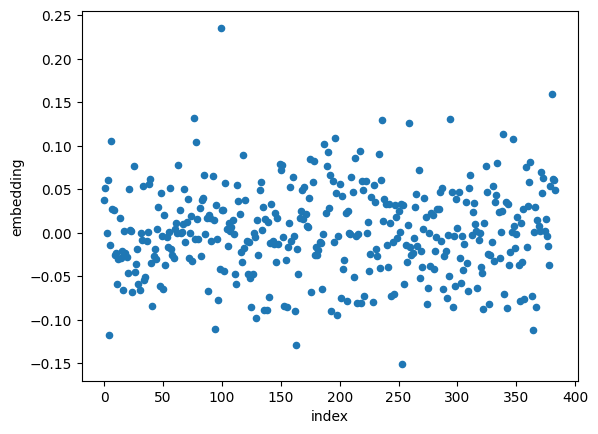

In [7]:
df.reset_index().plot.scatter(x="index", y="embedding");

The chart gives us only a very abstract “picture” of the data; basically, a rough distribution of values (in the range of -0.15 to 0.23).

On their own, these numbers are rather meaningless. This is actually expected, when we remember the theory of language as a “system of distinct signs”. No word has meaning in isolation; its meaning comes from the relation to other words in the system. So, what if we try to visualize both words, “cat” and “dog”?

Let's create a new dataframe, using “cat” and “dog” as an index and compacting the embeddings to a single column.

In [8]:
df = pd.DataFrame(
    [
      [embeddings_for_cat],
      [embeddings_for_dog],
    ],
    index=["cat", "dog"], columns=["embeddings"]
)
df

,embeddings
cat,"[0.03733039, 0.0511619, -0.00030606816, 0.0602..."
dog,"[-0.05314704, 0.014194381, 0.0071458234, 0.068..."


In order to plot the data, we need to do a couple of transformations.

In [9]:
# Add a new column to store the original index values (0-383) for each embedding
df["position"] = [list(range(len(df.embeddings[i]))) for i in df.index]

# Convert the `embeddings` and `position` columns from "wide" to "long" format
df_exploded = df.explode(["embeddings", "position"])

# Convert the index into a regular column
df_exploded = df_exploded.reset_index()

# Rename columns for more clarity
df_exploded = df_exploded.rename(columns={"index": "animal", "embeddings": "embedding"})

# Add a new column with numerical values mapped from the `animal` column values
df_exploded["color"] = df_exploded["animal"].map({"cat": 1, "dog": 2})

df_exploded

,animal,embedding,position,color
0,cat,0.03733,0,1
1,cat,0.051162,1,1
2,cat,-0.000306,2,1
3,cat,0.06021,3,1
4,cat,-0.117494,4,1
...,...,...,...,...
763,dog,0.03667,379,2
764,dog,0.111445,380,2
765,dog,0.029857,381,2
766,dog,0.023905,382,2


Now we can plot the transformed data.

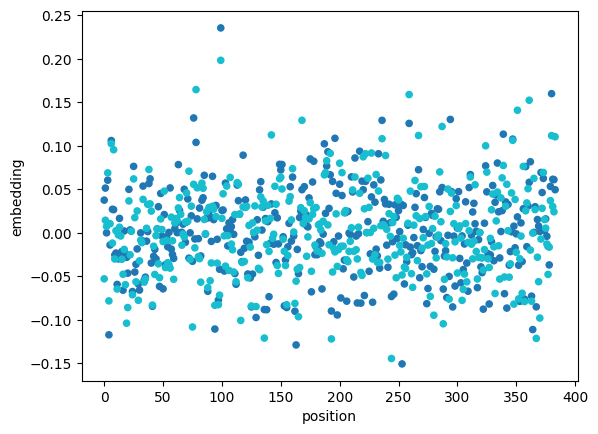

In [10]:
(df_exploded
  .plot
  .scatter(x="position", y="embedding", c="color", colormap="tab10")
  .collections[0].colorbar.remove())

It doesn't seem like a naïve visualization such as this one will be of much help. It highlights, though, a fundamental difficulty of multi-dimensional vector spaces. As humans, we are very capable of visualizing objects in 2D or 3D space. More dimensions are simply not something we can effectively imagine, much less “draw”.

A trick we can use is to [_reduce the dimensionality_]((https://en.wikipedia.org/wiki/Dimensionality_reduction\)), in this case from 384 dimensions to 2. (Again: we are able to do that because of the fact that we're working with _numerical representation_ of language.) There are many algorithms for doing so — we'll use principal component analysis (PCA), as it's readily available in the `scikit-learn` package and works well for small datasets. (See an [excellent article](https://plotly.com/python/t-sne-and-umap-projections/) from the _Plotly_ package documentation for examples on using the t-SNE and UMAP algorithms.)

In [11]:
import numpy as np
from sklearn.decomposition import PCA

# Drop the `position` column as it's no longer needed
df.drop(columns=["position"], inplace=True, errors="ignore")

# Convert embeddings to a 2D array and display their shape
print("Embeddings shape:", np.stack(df["embeddings"]).shape)

# Initialize the PCA reducer to convert embeddings into arrays of length of 2
reducer = PCA(n_components=2)

# Reduce the embeddings, store them in a new dataframe column and display their shape
df["reduced"] = reducer.fit_transform(np.stack(df["embeddings"])).tolist()
print("Reduced embeddings shape:", np.stack(df["reduced"]).shape)

df

Embeddings shape: (2, 384)
Reduced embeddings shape: (2, 2)


,embeddings,reduced
cat,"[0.03733039, 0.0511619, -0.00030606816, 0.0602...","[-0.41192373633384705, 3.2534185123722636e-08]"
dog,"[-0.05314704, 0.014194381, 0.0071458234, 0.068...","[0.4119238257408142, 3.253417801829528e-08]"


As we can see, the reduced embeddings have only two dimensions, so we can plot them on a Cartesian plane as `x` and `y` coordinates, using the [_Vega-Altair_](https://altair-viz.github.io) package. Let's create a function so we can reuse the code later.

In [12]:
import altair as alt

def scatterplot(
    data: pd.DataFrame,
    tooltips=False,
    labels=False,
    width=800,
    height=200,
) -> alt.Chart:
    base_chart = (
        alt.Chart(data)
        .encode(
            alt.X("x", scale=alt.Scale(zero=False)),
            alt.Y("y", scale=alt.Scale(zero=False)),
        )
        .properties(width=width, height=height)
    )

    if tooltips:
        base_chart = base_chart.encode(alt.Tooltip(["text"]))

    circles = base_chart.mark_circle(
        size=200, color="crimson", stroke="white", strokeWidth=1
    )

    if labels:
        labels = base_chart.mark_text(
            fontSize=13,
            align="left",
            baseline="bottom",
            dx=5,
        ).encode(text="text")
        chart = circles + labels
    else:
        chart = circles

    return chart

In [13]:
source = pd.DataFrame(
    {
        "text": df.index,
        "x": df["reduced"].apply(lambda x: x[0]).to_list(),
        "y": df["reduced"].apply(lambda x: x[1]).to_list(),
    }
)

scatterplot(source, labels=True)

alt.LayerChart(...)

All right. The chart is rather underwhelming — just two circles, placed randomly on a canvas. We might have expected that the marks would be displayed close to each other; after all, cats and dogs share a lot of characteristics. However, working with the premise of language as a system, our limited “system” contains only two words: “cat” and “dog”.

We, as humans, might consider these signs closely related: they both represent furry animals with four legs, commonly held as pets, both carnivores of the mammalian genus, and so on. But such intuition comes from a _very large_ system of our language, with many other concepts occupying different positions. To quote Saussure from earlier, “the concepts are purely differential and defined not by their positive content but negatively by their relations with the other terms of the system”.

Let's try adding more words to the collection, then, and see if the picture changes in a meaningful way.

In [14]:
words = ["cat", "dog", "table", "chair", "pizza", "pasta", "asymptomatic"]

# Create a new dataframe
df = pd.DataFrame(
    [[model.encode(word)] for word in words],
    columns=["embeddings"],
    index=words,
)

# Perform dimensionality reduction
df["reduced"] = reducer.fit_transform(np.stack(df["embeddings"])).tolist()
df

,embeddings,reduced
cat,"[0.03733039, 0.0511619, -0.00030606816, 0.0602...","[-0.43801048398017883, -0.26243406534194946]"
dog,"[-0.05314704, 0.014194381, 0.0071458234, 0.068...","[-0.4829082787036896, -0.2821101248264313]"
table,"[0.031432427, 0.0013003134, -0.091571234, 0.01...","[0.21471957862377167, -0.3291183412075043]"
chair,"[-0.00027702627, 0.05202283, -0.054319937, 0.0...","[0.20435161888599396, -0.1891215443611145]"
pizza,"[-0.08696939, 0.06991054, -0.0150973685, 0.096...","[-0.1220669075846672, 0.525505006313324]"
pasta,"[-0.07682365, -0.011072064, -0.022458978, 0.08...","[-0.0810772180557251, 0.5807340145111084]"
asymptomatic,"[0.031974357, 0.020842418, -0.064985596, 0.171...","[0.7049920558929443, -0.0434550903737545]"


Let's display a scatterplot chart again.

In [15]:
source = pd.DataFrame(
    {
        "text": df.index,
        "x": df["reduced"].apply(lambda x: x[0]).to_list(),
        "y": df["reduced"].apply(lambda x: x[1]).to_list(),
    }
)

scatterplot(source, labels=True)

alt.LayerChart(...)

Much better! We can clearly see three “clusters” of related words, `cat ⇔ dog`, `pizza ⇔ pasta`, `table ⇔ chair`. We can also see that the word `asymptomatic` stands alone, apart from the three clusters.

Is it the “black magic” of artificial intelligence? Not really. The `all-MiniLM-L6-v2` model has been trained [on a large amount of text](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2#training-data) from Reddit, Stack Exchange, Wikipedia, Quora, and other sources, written by humans. Therefore, it does have the meaning of these words almost literally “embedded” in the 384-dimensional vector that it generates.

## Loading the Dataset

With a better, practical understanding of why and how text embeddings work, we can return to the initial motivation for this notebook: recreating the example of semantic search from the [article](https://docs.pinecone.io/docs/semantic-text-search) by James Briggs, using Elasticsearch instead of Pinecone.

We will use the [`datasets`](https://huggingface.co/docs/datasets/load_hub) package from _Hugging Face_ to load the [_Quora_ data](https://huggingface.co/datasets/quora). It's a very sophisticated “wrapper” around the data, which provides convenient features like built-in caching of downloaded files and efficient [processing](https://huggingface.co/docs/datasets/process#map) capabilities, which we'll use to manipulate the data.

The _Hugging Face_ datasets are primarily oriented on providing data for training the models, so they are divided into [“splits”](https://huggingface.co/docs/datasets/load_hub#splits) like `train`, `test`, `validation`. Our particular dataset has only the `train` split. Let's load it and display some metadata about the dataset.

In [99]:
import humanize
import datasets

dataset = datasets.load_dataset("quora", split="train")

print("Description:", dataset.info.description, "\n")
print("Homepage:", dataset.info.homepage)
print("Downloaded size:", humanize.naturalsize(dataset.info.download_size))
print("Number of examples:", humanize.intcomma(dataset.info.splits["train"].num_examples))
print("Features:", dataset.info.features)

Found cached dataset quora (/Users/karmi/.cache/huggingface/datasets/quora/default/0.0.0/36ba4cd42107f051a158016f1bea6ae3f4685c5df843529108a54e42d86c1e04)


Description: The Quora dataset is composed of question pairs, and the task is to determine if the questions are paraphrases of each other (have the same meaning). 

Homepage: https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs
Downloaded size: 58.2 MB
Number of examples: 404,290
Features: {'questions': Sequence(feature={'id': Value(dtype='int32', id=None), 'text': Value(dtype='string', id=None)}, length=-1, id=None), 'is_duplicate': Value(dtype='bool', id=None)}


As we can see, the dataset contains more than 400,000 “question pairs”. Let's look at the first five records.

In [61]:
dataset[:5]

{'questions': [{'id': [1, 2],
   'text': ['What is the step by step guide to invest in share market in india?',
    'What is the step by step guide to invest in share market?']},
  {'id': [3, 4],
   'text': ['What is the story of Kohinoor (Koh-i-Noor) Diamond?',
    'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?']},
  {'id': [5, 6],
   'text': ['How can I increase the speed of my internet connection while using a VPN?',
    'How can Internet speed be increased by hacking through DNS?']},
  {'id': [7, 8],
   'text': ['Why am I mentally very lonely? How can I solve it?',
    'Find the remainder when [math]23^{24}[/math] is divided by 24,23?']},
  {'id': [9, 10],
   'text': ['Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?',
    'Which fish would survive in salt water?']}],
 'is_duplicate': [False, False, False, False, False]}

The primary focus of this dataset is to provide reliable data for duplicate detection:

> Our first dataset is related to the problem of identifying duplicate questions.
>
> An important product principle for Quora is that there should be a single question page for each logically distinct question. As a simple example, the queries “What is the most populous state in the USA?” and “Which state in the United States has the most people?” should not exist separately on Quora because the intent behind both is identical. (...)
>
> The dataset that we are releasing today will give anyone the opportunity to train and test models of semantic equivalence, based on actual Quora data. (...)
> 
> — Kornél Csernai, [_First Quora Dataset Release: Question Pairs_](https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs)

Therefore, the dataset contains question _pairs_, which are labeled as either being duplicates or no. Let's display some examples of duplicated questions, using utilities of the `datasets` package for selecting and filtering the data.

In [79]:
(dataset
  .select(range(1000))
  .filter(lambda record: record["is_duplicate"])[:3])

Loading cached processed dataset at /Users/karmi/.cache/huggingface/datasets/quora/default/0.0.0/36ba4cd42107f051a158016f1bea6ae3f4685c5df843529108a54e42d86c1e04/cache-509cbf88fe94c2a3.arrow


{'questions': [{'id': [11, 12],
   'text': ['Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
    "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?"]},
  {'id': [15, 16],
   'text': ['How can I be a good geologist?',
    'What should I do to be a great geologist?']},
  {'id': [23, 24],
   'text': ['How do I read and find my YouTube comments?',
    'How can I see all my Youtube comments?']}],
 'is_duplicate': [True, True, True]}

Somewhat paradoxically, the dataset does not contain the question _“What is the most populous state in the USA?”_ mentioned in the article.

In [59]:
dataset.filter(lambda record: "What is the most populous state in the USA?" in record["questions"]["text"])[:]

Loading cached processed dataset at /Users/karmi/.cache/huggingface/datasets/quora/default/0.0.0/36ba4cd42107f051a158016f1bea6ae3f4685c5df843529108a54e42d86c1e04/cache-2eb09901d3ea513c.arrow


{'questions': [], 'is_duplicate': []}

Let's start with cleaning up and transforming the dataset, so we can load the individual questions into Elasticsearch as separate documents.

First, we'll remove the `is_duplicate` column and [“flatten”](https://huggingface.co/docs/datasets/process#flatten) the `questions` property, ie. expand it into separate columns.

In [100]:
print("Original dataset:", dataset, "\n")

# Remove the `is_duplicate` column
dataset = dataset.remove_columns("is_duplicate")

# Flatten the dataset
dataset = dataset.flatten()

print("Transformed dataset:", dataset, "\n")

dataset[:5]

Original dataset: Dataset({
    features: ['questions', 'is_duplicate'],
    num_rows: 404290
}) 

Transformed dataset: Dataset({
    features: ['questions.id', 'questions.text'],
    num_rows: 404290
}) 



{'questions.id': [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]],
 'questions.text': [['What is the step by step guide to invest in share market in india?',
   'What is the step by step guide to invest in share market?'],
  ['What is the story of Kohinoor (Koh-i-Noor) Diamond?',
   'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?'],
  ['How can I increase the speed of my internet connection while using a VPN?',
   'How can Internet speed be increased by hacking through DNS?'],
  ['Why am I mentally very lonely? How can I solve it?',
   'Find the remainder when [math]23^{24}[/math] is divided by 24,23?'],
  ['Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?',
   'Which fish would survive in salt water?']]}

We have improved the structure somewhat, but we still have two questions in the `question.text` field. For indexing the questions efficiently, it would be best if each question is stored as a separate row. We will use the powerful [`map()`](https://huggingface.co/docs/datasets/process#map) functionality provided by the package, expanding the `questions.id` and `questions.text` columns.

In [101]:
# Expand the values from the lists into separate lists
def expand_values(batch):
    ids = []
    texts = []

    for id_list, text_list in zip(batch["questions.id"], batch["questions.text"]):
        ids.extend(id_list)
        texts.extend(text_list)

    return {"id": ids, "text": texts}

# Run the "expand_values" function for batches of rows in the dataset
dataset = dataset.map(
    expand_values,
    batched=True,
    remove_columns=dataset.column_names,
    desc="Expand Questions",
)

print("Transformed dataset:", dataset, "\n")

dataset[:5]

Loading cached processed dataset at /Users/karmi/.cache/huggingface/datasets/quora/default/0.0.0/36ba4cd42107f051a158016f1bea6ae3f4685c5df843529108a54e42d86c1e04/cache-02e1bee9e46fb947.arrow


Transformed dataset: Dataset({
    features: ['id', 'text'],
    num_rows: 808580
}) 



{'id': [1, 2, 3, 4, 5],
 'text': ['What is the step by step guide to invest in share market in india?',
  'What is the step by step guide to invest in share market?',
  'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
  'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?',
  'How can I increase the speed of my internet connection while using a VPN?']}

The dataset contains twice the number of rows, as each question is now stored as a separate row.

The next step is removing duplicated questions. We didn't use the `is_duplicate` column for de-duplication, because we still want to index all the questions, even when they are semantically same (_“How can I be a good geologist?”_ vs. _“What should I do to be a great geologist?”_). We just want to remove questions where the text is exactly the same. We'll use the `map()` function again.

In [102]:
# Create a Python set to keep track of processed questions
seen = set()

# Remove rows with exactly the same text value
def remove_duplicate_rows(batch):
    global seen

    output = {"id": [], "text": []}

    for id, text in zip(batch["id"], batch["text"]):
        if text not in seen:
            seen.add(text)
            output["id"].append(id)
            output["text"].append(text)

    return output

# Run the "remove_duplicate_rows" function for batches of rows in the dataset
dataset = dataset.map(
    remove_duplicate_rows,
    batched=True,
    batch_size=1000,
    remove_columns=dataset.column_names,
    desc="Remove Duplicates",
)

dataset

Remove Duplicates:   0%|          | 0/808580 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'text'],
    num_rows: 537362
})

The dataset now contains 537,362 unique questions.

We will generate text embeddings for these questions, using the same method previously demonstrated with “cat” and “dog”. Later on, we will index them into Elasticsearch, in order to use a specialized query type called “approximate nearest neighbors” to find semantically similar documents.

Let's process the dataset with the `map()` method again.

In [145]:
import time

%env TOKENIZERS_PARALLELISM=true

# Compute embeddings for batches of question text
def compute_embeddings(batch):
    return { "embeddings": model.encode(sentences=batch["text"]) }

try:
    start = time.perf_counter()
    dataset = dataset.map(
        compute_embeddings,
        batched=True,
        batch_size=1000,
        desc="Compute Embeddings",
    )
except KeyboardInterrupt:
    print("Creating text embeddings interrupted by the user...")

print(
    "Dataset with embeddings:", dataset,
    f"(duration: {humanize.precisedelta(time.perf_counter() - start)})",
    "\n")

# Print a sample of the embeddings for first question
print(list(dataset[:1]["embeddings"][0][:5]) + ["..."])

env: TOKENIZERS_PARALLELISM=true


Compute Embeddings:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset with embeddings: Dataset({
    features: ['id', 'text', 'embeddings'],
    num_rows: 1000
}) (duration: 25 minutes 8 seconds) 

[0.06814990937709808, -0.03966414928436279, -0.06096725910902023, 0.007466054521501064, -0.0587276816368103, '...']


As you can see, this is a resource-intensive operation, which can take more than 20 minutes on an Apple notebook with a M1 chip. To keep the full dataset with embeddings, use the [`save_to_disk()`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.Dataset.save_to_disk) method.

## Indexing the Data

In the next step, we'll create an Elasticsearch index with specific mappings for storing the embeddings in a [`dense_vector`](https://www.elastic.co/guide/en/elasticsearch/reference/current/dense-vector.html) field type, and the question text in a regular `text` field, processed with the `english` analyzer.

If you want to try running these examples yourself, you need an Elasticsearch cluster. Use the Docker Compose file available in this repository to launch a cluster locally.

In [146]:
import os
from elasticsearch import Elasticsearch

INDEX_NAME = "quora-with-embeddings-v1"
es = Elasticsearch(hosts=os.getenv("ELASTICSEARCH_URL"), request_timeout=300)

if not es.indices.exists(index=INDEX_NAME):
    es.indices.create(
        index=INDEX_NAME,
        mappings={
            "properties": {
                "text": {
                    "type": "text",
                    "analyzer": "english",
                },
                "embeddings": {
                    "type": "dense_vector",
                    "dims": model.get_sentence_embedding_dimension(),
                    "index": "true",
                    "similarity": "cosine",
                },
            }
        },
    )

    print(f"Created Elasticsearch index at {os.getenv('ELASTICSEARCH_URL')}/{INDEX_NAME}?pretty")
else:
    print(f"Skipping index creation, index already exists")

Created Elasticsearch index at http://localhost:9200/quora-with-embeddings-v1?pretty


Now we're ready to index the data. We'll use the [`parallel_bulk()`](https://elasticsearch-py.readthedocs.io/en/v8.8.1/helpers.html#example) helper of the Elasticsearch client, as it's the most convenient way of loading the data: it optimizes the process by running the client in multiple threads, and it accepts a Python _iterable_ or _generator_, and thus provides a high-level interface for indexing large data sets. We will use the [`to_iterable_dataset()`](https://huggingface.co/docs/datasets/v2.13.1/en/about_mapstyle_vs_iterable#switch-from-mapstyle-to-iterable) method of the dataset to convert it to a generator. This conversion is beneficial especially for large datasets, as it allows for more memory-efficient processing.

In [24]:
import os
import time
from elasticsearch.helpers import parallel_bulk

if es.count(index=INDEX_NAME)["count"] >= len(dataset):
    print("Skipping indexing, data already indexed.")
else:
    progress = notebook_tqdm(unit="docs", total=len(dataset))
    indexed = 0
    start = time.perf_counter()

    # Remove the "id" column and convert the dataset to generator
    iterable_dataset = dataset.remove_columns(["id"]).to_iterable_dataset()

    try:
        print(f"Indexing dataset to [{INDEX_NAME}]...")

        for ok, result in parallel_bulk(
            es,
            iterable_dataset,
            index=INDEX_NAME,
            thread_count=os.cpu_count()//2,
        ):
            indexed += 1
            progress.update(1)
        print(f"Indexed [{humanize.intcomma(indexed)}] documents in {humanize.precisedelta(time.perf_counter() - start)}")
    except KeyboardInterrupt:
        print(f"Indexing interrupted by the user, indexed [{humanize.intcomma(indexed)}] documents in {humanize.precisedelta(time.perf_counter() - start)}")

Indexing dataset to [quora-with-embeddings-v1]...


  0%|          | 0/537362 [00:00<?, ?docs/s]

Indexed [537,362] documents in 5 minutes and 54 seconds


All right! It looks like our documents have been successfully indexed. Let's check the index with the [_Cat Indices_](https://www.elastic.co/guide/en/elasticsearch/reference/current/cat-indices.html) API, displaying the number of documents and the size of the index on disk.

In [153]:
res = es.cat.indices(index=INDEX_NAME, format="json")
print(
    f"Index [{INDEX_NAME}] contains [{humanize.intcomma(res.body[0]['docs.count'])}] documents",
    f"and uses [{res.body[0]['pri.store.size'].upper()}] of disk space"
)

Index [quora-with-embeddings-v2] contains [537,362] documents and uses [3.9GB] of disk space


## Searching the Data

At this point, we can finally search the data with Elasticsearch.

We will define utility functions to wrap the search requests and return the results in a formatted Pandas dataframe. We will use the [`match`](https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-match-query.html) query for _lexical_ search, and the [`knn`](https://www.elastic.co/guide/en/elasticsearch/reference/current/knn-search.html) option for _semantic_ search.

In [172]:
import pandas as pd

# Lexical search with the `match` query
def search_keywords(query, size=10):
    res = es.search(
        index=INDEX_NAME,
        query={"match": {"text": query}},
        size=size,
        source_includes=["text", "embeddings"],
    )

    return pd.DataFrame(
        [
            {"text": hit["_source"]["text"], "embeddings": hit["_source"]["embeddings"], "score": hit["_score"]}
            for hit in res["hits"]["hits"]
        ]
    )

# Semantic search with the `knn` option
# https://www.elastic.co/guide/en/elasticsearch/reference/current/search-search.html#search-api-knn
def search_embeddings(query, size=10):
    res = es.search(
        index=INDEX_NAME,
        knn={
            "field": "embeddings",
            "query_vector": model.encode(query, normalize_embeddings=True),
            "k": size,
            "num_candidates": 1000,
        },
        size=size,
        source_includes=["text", "embeddings"],
    )

    return pd.DataFrame(
        [
            {"text": hit["_source"]["text"], "embeddings": hit["_source"]["embeddings"], "score": hit["_score"]}
            for hit in res["hits"]["hits"]
        ]
    )

# Returns the dataframe without the "embeddings" column and with a formatted "score" column
def styled(df):
    return (df[["score", "text"]]
        .style
        .set_table_styles([dict(selector="th,td", props=[("text-align", "left")])])
        .hide(axis="index")
        .format({"score": "{:.3f}"})
        .background_gradient(subset=["score"], cmap="Greys"))

# Add the utility function to the dataframe class
pd.DataFrame.styled = styled

Let's perform a lexical search with a query from the original article, _“Which city has the highest population in the world?”_.

In [159]:
search_keywords("Which city has the highest population in the world?").styled()

score,text
26.896,Which city in India has the highest percentage of youth population?
23.894,Which is the most populated city in the world.?
23.263,Which city has the highest number of historic buildings/monuments in the world?
22.259,Which state has highest Brahmin population in India?
22.259,Which Indian state has the highest population density?
21.151,Which place has the highest Asian Indian population in the USA?
20.944,Which city in India has a large Parsi population?
20.905,Which city in India has the highest number of pubs?
20.905,Which city in India has the highest standard of living?
20.380,What are the most populated cities in the world?


We can immediately observe that most results are not very relevant to our query. Apart from the items _`“Which is the most populated city in the world.?”`_ and _`“What are the most populated cities in the world?”`_, most results have almost no relation to the concept of “most populated city”. We can also observe how the default scoring algorithm boosts the phrase _“Which city (…)”_ at the beginning of the question, although the rest of the text is not relevant (number of historic buildings, standard of living, etc).

Let's perform a semantic search with the same query, to see if we get different results.

In [177]:
search_embeddings("Which city has the highest population in the world?").styled()

score,text
0.941,Which is the most populated city in the world.?
0.939,What is the most populated city in the world?
0.921,What are the most populated cities in the world?
0.907,Which is the largest city in the world?
0.898,Which is biggest city in the world?
0.893,What's the world's largest city?
0.893,Which country has the most population?
0.883,What country has the biggest population?
0.873,Which is the most populated country?
0.871,Which is the largest city in the world by area?


It is quite evident that these results are much more relevant to the concept of our query. The most relevant results from the lexical search are returned on top, and the next couple of results are almost synonymical to the “most populated city” concept, eg. “largest city” or “biggest city”. Notice also, how the _`“Which is the largest city in the world by area?”`_ result is listed after results related to countries (not cities). That's very much expected: our query is about size of _population_, not _area_.

Let's try something unexpected. Let's rephrase the query, so that it doesn't contain _any_ significant keywords from the matching documents, leaving out the determiner “which”, replacing “city” with “urban location” and “highest population” with “excessive concentration of homo sapiens”, admittedly a very unnatural phrase. (All credit for this reformulation goes to James Briggs, see a [specific version](https://github.com/pinecone-io/examples/blob/a6b9b32/search/semantic-search/semantic-search.ipynb) of the original article.)

In [206]:
search_embeddings("Urban locations with the highest concentration of homo sapiens").styled()

score,text
0.805,What are the most populated cities in the world?
0.795,What are the world's most advanced cities?
0.794,What is the most populated city in the world?
0.790,Which is the most populated city in the world.?
0.785,"What is the most isolated city in the world, with over a million metro area inhabitants?"
0.781,What is the most visited place ever (largest number of people occupying the very same space throughout history)?
0.778,What are 5 scientific challenges faced by big cities due to urbanization?
0.775,Which is the loneliest place on earth inhabited by less than 5 persons?
0.770,What are the world's most technologically advanced cities?
0.770,How much homo sapiens lived and died on planet earth?


Perhaps surprisingly, we get results mostly relevant to our query, especially at the top of the list, even though our query is deliberately constructed to not have a direct overlap between the query terms and document terms. This demonstrates the strongest point of semantic search in a powerful way.

Let's try the same query with the lexical search.

In [201]:
search_keywords("Urban locations with the highest concentration of homo sapiens").styled()

score,text
30.746,"When will ""Homo sapiens sapiens"" evolves in ""Homo sapiens sapiens sapiens""?"
29.510,How different are Homo sapien sapiens from Homo sapiens?
29.510,What's the difference between homo sapiens and homo sapiens sapiens?
28.661,How are Homo sapiens idaltu different from Homo sapiens sapiens?
26.487,Why do they classify the modern man as Homo sapiens sapiens? What makes a being a Homo sapiens sapiens?
25.179,What evolved into Homo sapiens?
22.394,Is it possible that there is another planet with homo sapien humans?
22.394,How did homo sapiens evolve consciousness?
21.220,How do we define humans/Homo sapiens?
21.220,Why are Homo sapiens and Neanderthals considered to be separate species?


We get _no_ results relevant to our query. With our understanding of the difference between lexical and semantic search, this shouldn't come as much of a surprise. In fact, this effect has a technical description, [_vocabulary mismatch_](https://en.wikipedia.org/wiki/Vocabulary_mismatch), where the query terms are too different from document terms. Even term manipulation like stemming or lemmatization, mentioned earlier, can't prevent this mismatch. Traditionally, the solution is to provide a list of synonyms to the search engine. However, this quickly gets complicated, as ultimately, we would need to supply a full thesaurus. (Moreover, due to the way the scoring algorithm usually works, it wouldn't be able to discriminate between a word and its synonyms when computing the score for each result.)

Let's return to our original query, with a slightly different phrasing, and see if we can visualize the embeddings and results, similarly to our demonstration with single words like “cat” and “dog”.

In [238]:
df = search_embeddings("What is the most populated city in the world?")
df

,text,embeddings,score
0,What is the most populated city in the world?,"[0.13103964924812317, 0.016204705461859703, -0...",1.000000
1,Which is the most populated city in the world.?,"[0.14043977856636047, 0.024480342864990234, -0...",0.990207
2,What are the most populated cities in the world?,"[0.1380167156457901, -0.0007771807722747326, -...",0.986257
3,Which is the most populated country?,"[0.14331300556659698, 0.005592127796262503, -0...",0.918946
4,Which is the largest city in the world?,"[0.12255951017141342, 0.03331490233540535, -0....",0.898932
5,Which is biggest city in the world?,"[0.12018731981515884, 0.04687153548002243, -0....",0.894474
6,What's the world's largest city?,"[0.12429719418287277, 0.010167860426008701, -0...",0.893242
7,What is the biggest city in the world by area?,"[0.1517365276813507, 0.03082786500453949, -0.0...",0.885677
8,Which is the largest city in the world by area?,"[0.1522066444158554, 0.023621227592229843, -0....",0.881623
9,"What is the most isolated city in the world, w...","[0.10091247409582138, -0.011301622726023197, -...",0.881128


We will need to convert the dataframe from [“wide” to “long”](https://altair-viz.github.io/user_guide/data.html#long-form-vs-wide-form-data) format again, using the `explode()` dataframe method.

In [239]:
# Store the original index values (0-9) as position
df["position"] = [list(range(len(df.embeddings[i]))) for i in df.index]

# Convert the `embeddings` and `position` columns from "wide" to "long" format
source = df.explode(["embeddings", "position"])

# Rename the `embeddings` column to `embedding`
source = source.rename(columns={ "embeddings": "embedding"})

source

,text,embedding,score,position
0,What is the most populated city in the world?,0.13104,1.000000,0
0,What is the most populated city in the world?,0.016205,1.000000,1
0,What is the most populated city in the world?,-0.04909,1.000000,2
0,What is the most populated city in the world?,0.069318,1.000000,3
0,What is the most populated city in the world?,-0.02237,1.000000,4
...,...,...,...,...
9,"What is the most isolated city in the world, w...",0.009746,0.881128,379
9,"What is the most isolated city in the world, w...",0.011482,0.881128,380
9,"What is the most isolated city in the world, w...",-0.004106,0.881128,381
9,"What is the most isolated city in the world, w...",-0.031268,0.881128,382


Let's create a “heatmap” of the embeddings for each result with _Vega-Altair_.

In [240]:
import altair as alt

alt.Chart(
    source
).encode(
    alt.X("position:N", title="").axis(labels=False, ticks=False),
    alt.Y("text:N", title="", sort=source["score"].unique()).axis(labelLimit=300, tickWidth=0, labelFontWeight="bold"),
    alt.Color("embedding:Q").scale(scheme="goldred").legend(None),
).mark_rect(
    width=3
).properties(width=alt.Step(3), height=alt.Step(25))

alt.Chart(...)

With a slight risk of doing a “reading from tea leaves” kind of analysis, we can still discern specific patterns in the chart. Notice a very similar visual pattern of the first three results. The fourth result breaks that pattern somewhat, perhaps because it's about a most populated _country_ instead of a _city_. Similarly, the two results related to the largest city _by area_ form a distinct visual pattern.

However, as before, we can see how challenging it is to understand visualizations with a high number of dimensions. Let's try to reduce the dimensionality again, and plot the results on a two-dimensional plane. 

In [250]:
import numpy as np
from sklearn.decomposition import PCA

# Initialize the PCA reducer to convert embeddings into arrays of length of 2
reducer = PCA(n_components=2)

# Drop the `position` column as it's no longer needed
df.drop(columns=["position"], inplace=True, errors="ignore")

# Convert embeddings to a 2D array and display their shape
embeddings = np.stack(df["embeddings"].to_numpy())
print("Embeddings shape:", embeddings.shape)

# Reduce the embeddings, store them in a new dataframe column and display their shape
df["reduced"] = reducer.fit_transform(np.stack(df["embeddings"])).tolist()
print("Reduced embeddings shape:", np.stack(df["reduced"]).shape)

df

Embeddings shape: (10, 384)
Reduced embeddings shape: (10, 2)


,text,embeddings,score,reduced
0,What is the most populated city in the world?,"[0.13103964924812317, 0.016204705461859703, -0...",1.000000,"[0.2689571906567488, -0.05183763632548388]"
1,Which is the most populated city in the world.?,"[0.14043977856636047, 0.024480342864990234, -0...",0.990207,"[0.2659064235264346, -0.0605416637248274]"
2,What are the most populated cities in the world?,"[0.1380167156457901, -0.0007771807722747326, -...",0.986257,"[0.3116296072174778, -0.03460714465962103]"
3,Which is the most populated country?,"[0.14331300556659698, 0.005592127796262503, -0...",0.918946,"[0.5231726748738307, -0.20330644415362628]"
4,Which is the largest city in the world?,"[0.12255951017141342, 0.03331490233540535, -0....",0.898932,"[-0.3049644162967989, -0.08541420414484]"
5,Which is biggest city in the world?,"[0.12018731981515884, 0.04687153548002243, -0....",0.894474,"[-0.31563328983856964, -0.06104270393610539]"
6,What's the world's largest city?,"[0.12429719418287277, 0.010167860426008701, -0...",0.893242,"[-0.30214103181593205, -0.07895521461706545]"
7,What is the biggest city in the world by area?,"[0.1517365276813507, 0.03082786500453949, -0.0...",0.885677,"[-0.2920833305395347, 0.017243447429835457]"
8,Which is the largest city in the world by area?,"[0.1522066444158554, 0.023621227592229843, -0....",0.881623,"[-0.2929915299154269, -0.01369589759517316]"
9,"What is the most isolated city in the world, w...","[0.10091247409582138, -0.011301622726023197, -...",0.881128,"[0.1381477021317695, 0.5721574617269066]"


With the data enriched with the `reduced` column, let's feed it to the `scatterplot()` function we have defined before.

In [258]:
source = pd.DataFrame({
    "text": df["text"],
    "x": df["reduced"].apply(lambda x: x[0]).to_list(),
    "y": df["reduced"].apply(lambda x: x[1]).to_list(),
})

scatterplot(source, tooltips=True)

alt.Chart(...)

We can observe two fairly well-defined clusters. The one on the left groups results related to the “largest city”, the one on the right groups results specifically about “population”. The two remaining results are clear outliers. Even with the dimensionality of text embeddings reduced from 384 to 2, they keep the “embedded” meaning within the _system of signs_ of human language.

## The Power of Semantic Search

Hopefully this notebook has helped you to understand not only _how_, but also _why_ semantic search works, by tying the technical discussion of text embeddings to the broader theory of language, represented by Ferdinand de Saussure's _Course in General Linguistics_. Regardless of whether we search for “city” or “urban location”, “people” or “homo sapiens”, thanks to the meaning of these concepts “embedded” in the pre-trained model, we get (mostly) relevant results. It does not mean that lexical search is “dead”, but thanks to maturity and availability of machine learning models, semantic search looks more and more promising.

Let's see one final example, which demonstrates rather well the difference between a lexical and semantic search.

We will look for documents matching the phrase `“How can I be a good geologist?”`, taken from the sample of questions marked by duplicates in the dataset. We will return 20 results instead of the default 10, first with a lexical search.

In [261]:
results_lexical = search_keywords("How can I be a good geologist?", size=20)
results_lexical.styled()

score,text
23.077,How can I be a good geologist?
14.648,How do geologists predict earthquakes?
14.540,How can a mid career geologist become a civil engineer?
14.043,What should I do to be a great geologist?
13.838,How do geologists classify crystal structures?
13.785,What do geologists do?
13.785,Does Google hire geologist?
13.223,"How can a petroleum geologist describe ""drilling on structure"" and ""drilling off structure""?"
10.124,What knowledge should I have to be a geologist in nasa or isro or some other space research organisations?
10.099,How I can be good at handwriting?


The document matching our query verbatim is returned first, as expected, due to the exact keyword match. However, the only other relevant result appears to be `“What should I do to be a great geologist?”`. And even this result has a rather low score — after all, it is marked in the dataset as a “duplicate question”, so its meaning is the same. The bottom results seem to be practically irrelevant, matching mostly on the phrase `“how can I (…)”`, ignoring the rest of the sentence completely.

Now, let's try the same query with a semantic search.

In [262]:
results_semantic = search_embeddings("How can I be a good geologist?", size=20)
results_semantic.styled()

score,text
1.000,How can I be a good geologist?
0.968,What should I do to be a great geologist?
0.874,What do geologists do?
0.862,How can a mid career geologist become a civil engineer?
0.862,What knowledge should I have to be a geologist in nasa or isro or some other space research organisations?
0.841,Where is a good place to study geology?
0.822,What can one do to get accepted into a top geology undergrad college?
0.811,How can I be a great scientist?
0.811,What will be my future if I take Bsc Geology?
0.810,What are common required and elective courses in geology?


Without much surprise, the two results matching our query most closely are returned first. (The score of `1.0` means that the document and query are semantically identical in the vector space.) But almost all the results are semantically relevant, one way or another, to the question in our query.

To inspect the “semantic landscape of the entire dataset, we can display the embeddings with the [_Atlas_](https://atlas.nomic.ai) utility by _Nomic.ai_, an [interactive “map”](https://atlas.nomic.ai/map/quora-embeddings) of very large vector spaces.

In [7]:
%%HTML
<iframe id="atlas-map-quora" src="about:blank" width="100%" height="400"></iframe>
<script type="text/javascript">
  window.onscroll = function(e) { // Lazy-load the iframe
    const iframe = document.querySelector("#atlas-map-quora");
    const rect = iframe.getBoundingClientRect();
    if (rect.top < window.innerHeight && iframe.src === "about:blank") { iframe.src = "https://atlas.nomic.ai/map/quora-embeddings"; }
  }
</script>

## Resources and Further Reading

* The [_Semantic Search_](https://docs.pinecone.io/docs/semantic-text-search) article by James Briggs has been the original inspiration for this experiment
* [_What is Semantic Search?_](https://txt.cohere.com/what-is-semantic-search/) by Luis Serrano from Cohere provides an excellent introduction to semantic search with great examples
* [_What Are Word and Sentence Embeddings?_](https://txt.cohere.com/sentence-word-embeddings/), again by Luis Serrano, presents another look at text embeddings, with great illustrations
* [_Dense Vectors: Capturing Meaning with Code_](https://www.pinecone.io/learn/dense-vector-embeddings-nlp/) gives a thorough technical explanation of the history behind “dense vectors”
* The [_Elasticsearch: Vector and Hybrid Search_](https://xeraa.net/talks/elasticsearch-vector-hybrid-search/) presentation by Philipp Krenn offers a great high-level overview of current support for “vector search” in Elasticsearch
* [_How to deploy NLP: Text Embeddings and Vector Search_](https://www.elastic.co/blog/how-to-deploy-nlp-text-embeddings-and-vector-search) by Mayya Sharipova demonstrates the nuts and bolts of “approximate nearest neighbor” in Elasticsearch by using an embedded model


## Thanks and Acknowledgments

Thanks to [Josef Šlerka](https://twitter.com/josefslerka) for his patience and encouragement over the days and weeks I have been working on this notebook. I would't have finished it otherwise.